# Addition of Two Numbers Using Machine Learning 

In [98]:
import numpy as np
import pandas  as pd

In [99]:
data = pd.read_csv('add.csv')
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


In [100]:
data.shape

(22, 3)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       22 non-null     float64
 1   y       22 non-null     float64
 2   sum     22 non-null     float64
dtypes: float64(3)
memory usage: 656.0 bytes


In [102]:
data.isnull().sum()

x      0
y      0
sum    0
dtype: int64

In [103]:
data.describe()

,x,y,sum
count,22.000000,22.000000,22.000000
mean,136.786364,248.686364,385.472727
std,229.622745,732.554988,938.706461
min,1.000000,1.000000,2.000000
25%,15.500000,31.000000,66.500000
50%,40.150000,56.800000,117.450000
75%,175.000000,85.925000,245.975000
max,1000.000000,3456.000000,4456.000000


In [104]:
import matplotlib.pyplot as plt

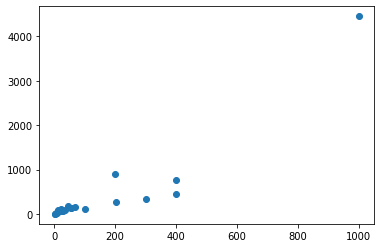

In [105]:
plt.scatter(data['x'],data['sum'])

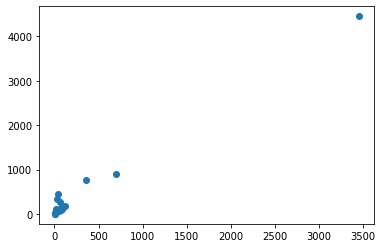

In [106]:
plt.scatter(data['y'],data['sum'])

# store feature metrix x and respons(Target) in vector y

In [107]:
x = data[['x','y']]
y = data['sum']

# Train test Split 

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
x_train.shape,x_test.shape

((17, 2), (5, 2))

In [110]:
x_train.head()

,x,y
5,23.0,43.0
20,45.7,123.7
11,300.0,34.0
3,10.0,10.0
4,30.0,30.0


# Train the model

In [111]:
from sklearn.linear_model import  LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

# Prediction perfomance

In [112]:
lr_model.score(x_train,y_train)

1.0

In [113]:
lr_model.score(x_test,y_test)

1.0

# compair the result

In [114]:
y_pred = lr_model.predict(x_test)
y_pred

array([  2. , 112.9,  68. ,   8. , 900. ])

In [115]:
np.array(y_test)

array([  2. , 112.9,  68. ,   8. , 900. ])

In [116]:
df = pd.DataFrame({'Actual':y_test,'predict':y_pred})
df

,Actual,predict
0,2.0,2.0
13,112.9,112.9
8,68.0,68.0
1,8.0,8.0
15,900.0,900.0


# Prediction

In [117]:
test = [[10,20]]
lr_model.predict(test)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.])

# Save the model  

In [122]:
import joblib
joblib.dump(lr_model,'model_joblib')

['model_joblib']

In [123]:
model = joblib.load('model_joblib')
model.predict([[10,40]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.])

# GUI

In [124]:
from tkinter import *
import joblib

In [126]:
def show_entry_filds():
    p1 = float(e1.get())
    p2 = float(e2.get())

    model = joblib.load('model_joblib')
    result = model.predict([[p1,p2]])

    Label(master,text='sum is:').grid(row=4)
    Label(master,text=result).grid(row=5)
    print('Result: ',result)


master=Tk()
master.title("Addition of two Number Using ML:")

label = Label(master,text='Addition of two Number Using ML:',bg = 'black' , fg = 'white').grid(row=0, columnspan = 2)
Label(master,text = 'Enter the first number:').grid(row = 1)
Label(master,text = 'Enter the second number:').grid(row = 2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='predict',command = show_entry_filds).grid(row=3,columnspan=2)
master.mainloop()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Result:  [90.]
